# Practica 6: Machine learning 
___
## Alumnos: Amparo Rubio Bellón y Jorge Zurdo Izquierdo

___
Para esta practica se ha implementado una serie de modelos (MultiLayer Perceptron y KNN) para el entrenamiento de un NPC de un juego de carreras.

Primero de todo se ha recogido un total de 8 partidas, que a lo mejor no son suficientes para el entrenamiento, pero al menos para dar una prueba de concepto. En cuanto a los modelos implementados se ha elegido como extra el KNN debido a que es un modelo muy simple e interpretable, además de que las decisiones que tenemos en este juego son muy simple y al no tener demasiados datos nos es muy conveniente.




Número de archivos en el directorio: 8
Kart00.csv
Kart01.csv
Kart02.csv
Kart03.csv
Kart04.csv
Kart05.csv
Kart06.csv
Kart07.csv
      ray1      ray2      ray3      ray4      ray5     kartx      kartz  \
0     -1.0  6.522205  4.611084  6.488569  4.588917  15.98892   3.105258   
1     -1.0  6.522391  4.611080  6.488383  4.588921  15.98892   3.105152   
2     -1.0  6.522393  4.611073  6.488382  4.588929  15.98893   3.105131   
3     -1.0  6.522389  4.611069  6.488386  4.588933  15.98893   3.105127   
4     -1.0  6.522381  4.611063  6.488393  4.588938  15.98894   3.105124   
...    ...       ...       ...       ...       ...       ...        ...   
2429  -1.0  8.977297  8.080659  2.470212  1.267042  12.50009  39.481900   
2430  -1.0  8.977297  8.080661  2.470213  1.267042  12.50009  39.481900   
2431  -1.0  8.977297  8.080661  2.470213  1.267042  12.50009  39.481900   
2432  -1.0  8.977297  8.080661  2.470213  1.267042  12.50009  39.481900   
2433  -1.0  8.977296  8.080661  2.470214  1.2670

C:\Users\ampxr\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


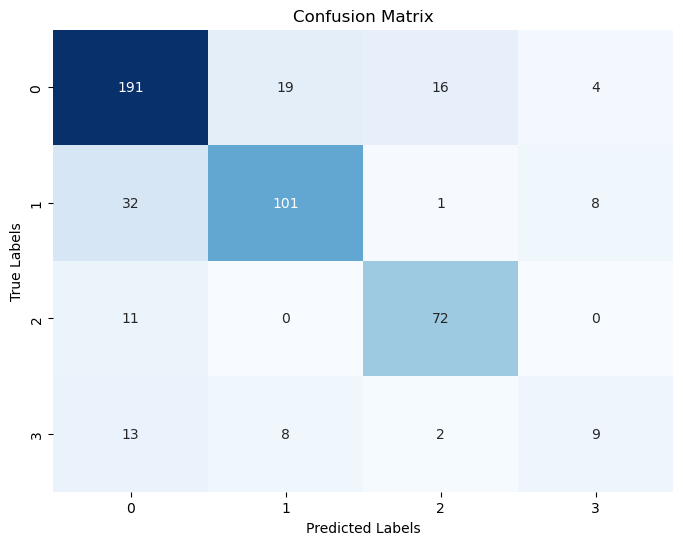

Accuracy: 76.59%


C:\Users\ampxr\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


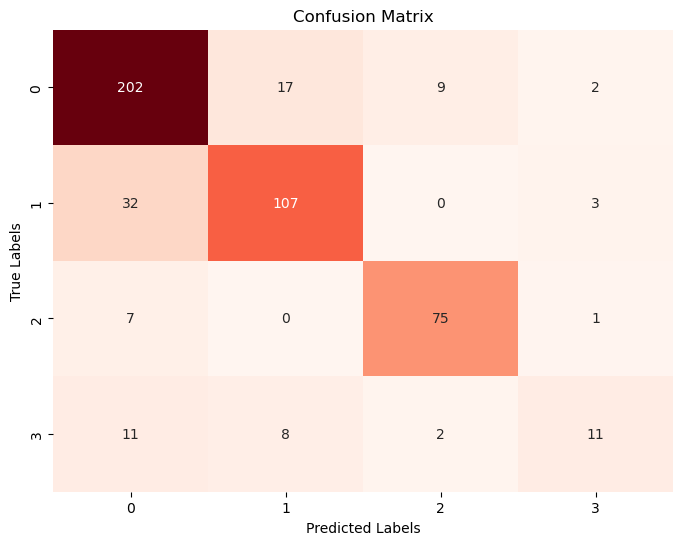

Accuracy: 81.11%


MissingShapeCalculator: Unable to find a shape calculator for type '<class 'numpy.ndarray'>'.
It usually means the pipeline being converted contains a
transformer or a predictor with no corresponding converter
implemented in sklearn-onnx. If the converted is implemented
in another library, you need to register
the converted so that it can be used by sklearn-onnx (function
update_registered_converter). If the model is not yet covered
by sklearn-onnx, you may raise an issue to
https://github.com/onnx/sklearn-onnx/issues
to get the converter implemented or even contribute to the
project. If the model is a custom model, a new converter must
be implemented. Examples can be found in the gallery.


In [4]:
import numpy as np
import pandas as pd
import os

import KNN
import MLP
import Utils


# Cargar el dataset
archivos= os.listdir('data') # dir
num_archivos = len(archivos) 
numero_de_archivos = len(archivos)
print(f'Número de archivos en el directorio: {numero_de_archivos}')
x=pd.DataFrame({}) # tabla en X
y=pd.DataFrame({}) #tabla en Y
# Recogemos los datos
for archivo in archivos:
        print(archivo) # nombre para refernciarnos
        df= pd.read_csv('data/' + archivo)
        aux=df.drop(['action','karty'], axis=1) # la verticalidad en este caso no es necesaria, si fueran circuitos mas complejos como los del mario kart 8 podría interesarnos
        auy=(df['action'])
        x= pd.concat([x, aux], ignore_index=True)
        y= pd.concat([y, auy], ignore_index=True)
    
        
        # Al final la idea es conseguir algo del estilo y= f(x) es decir la actionque se decida es en funcion de x 

print(x,y)

KNN.KNN(x,y)
mlp= MLP.MLP(x,y)

Utils.ExportAllformatsMLPSKlearn(mlp,x,"data.pickle","data.xml","data.json","data.txt")

       


